source:
https://read01.com/zh-tw/3x80zP.html#.Wmp0T6iWZPY

## Kaggle簡介
* https://www.kaggle.com/
* Kaggle是一個數據分析的競賽平台
* 企業或者研究者可以將數據、問題描述、期望的指標發布到Kaggle上，以競賽的形式向廣大的數據科學家徵集解決方案
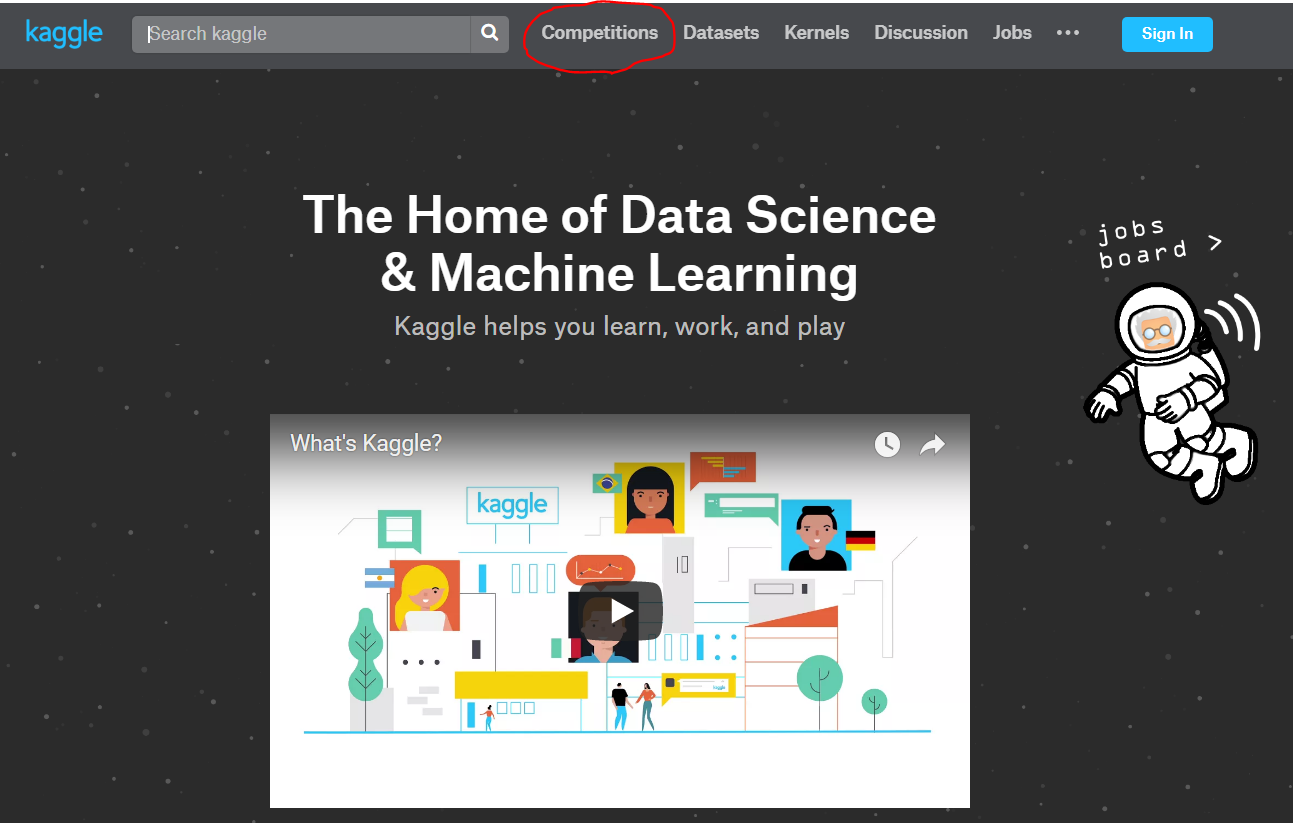

## 從競賽開始看起
* Featured：这些通常是由公司、组织甚至政府赞助的，奖金池最大
* Research：这些是研究方向的竞赛，只有很少或没有奖金。它们也有非传统的提交流程
* Recruitment：这些是由想要招聘数据科学家的公司赞助的
* Getting Started：这些竞赛的结构和 Featured 竞赛类似，但没有奖金。它们有更简单的数据集、大量教程和滚动的提交窗口让你可以随时输入
  - Getting Started 竞赛非常适合初学者
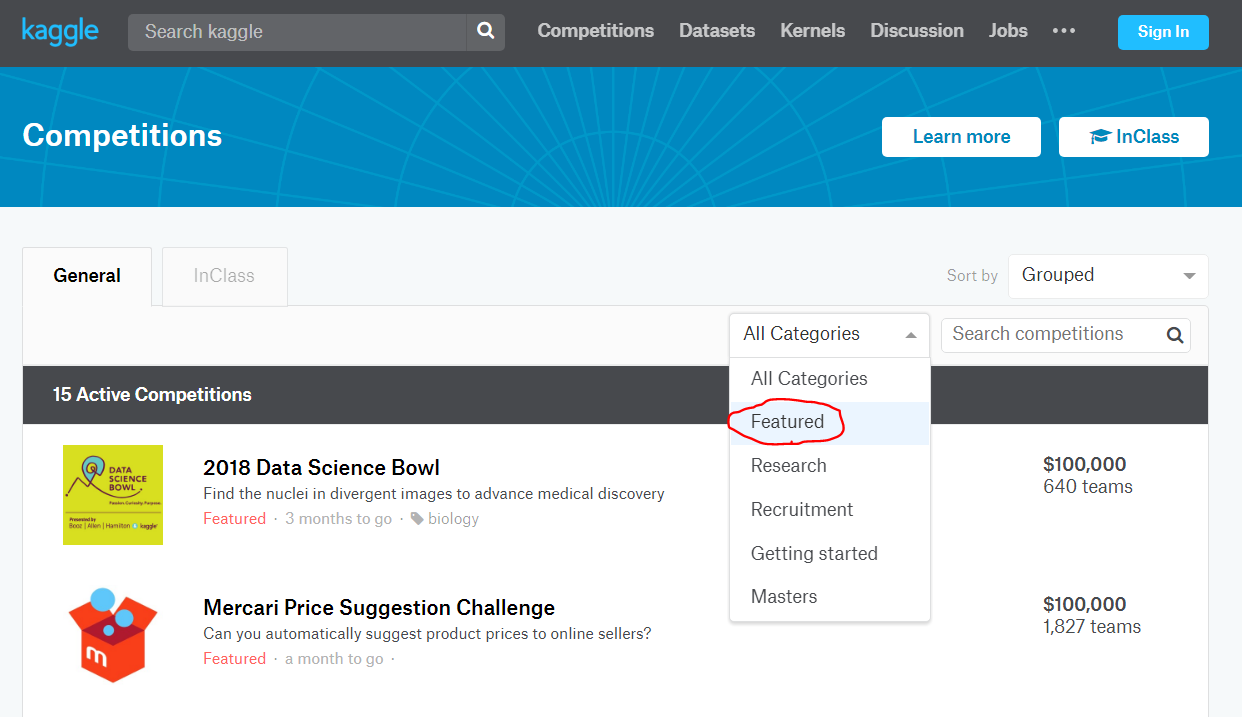

## 來做個練習賽吧
* "Getting started" 中有三個經典練習賽
* Titanic: Machine Learning from Disaster
* House Prices: Advanced Regression Techniques
* Digit Recognizer
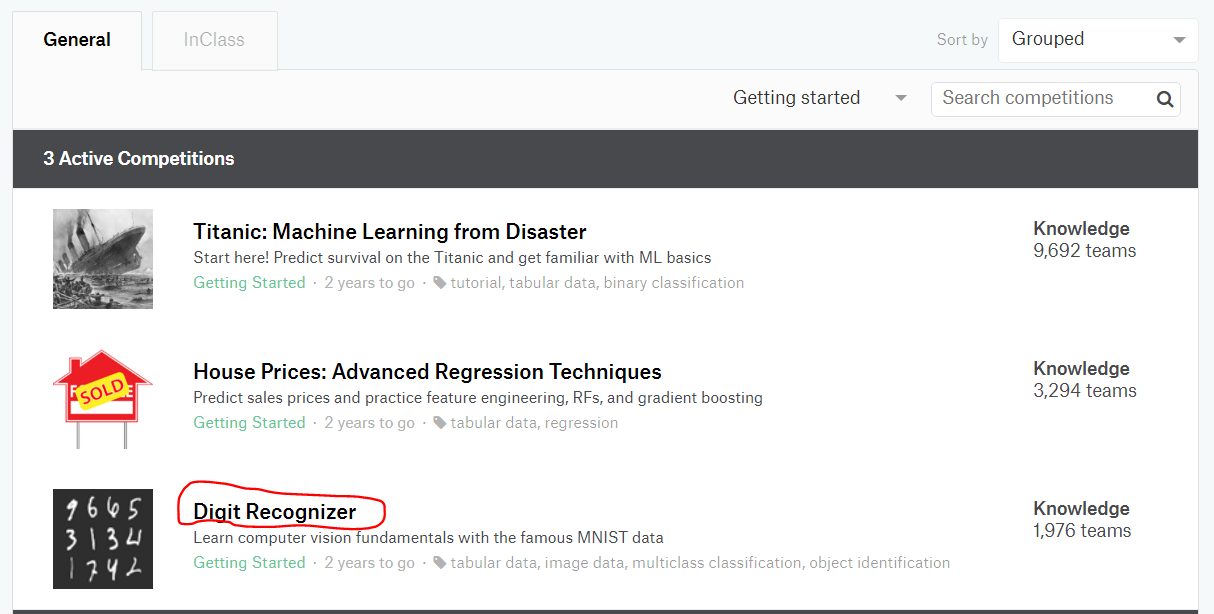

## 就從最熟悉的 "Digit Recognizer" 開始
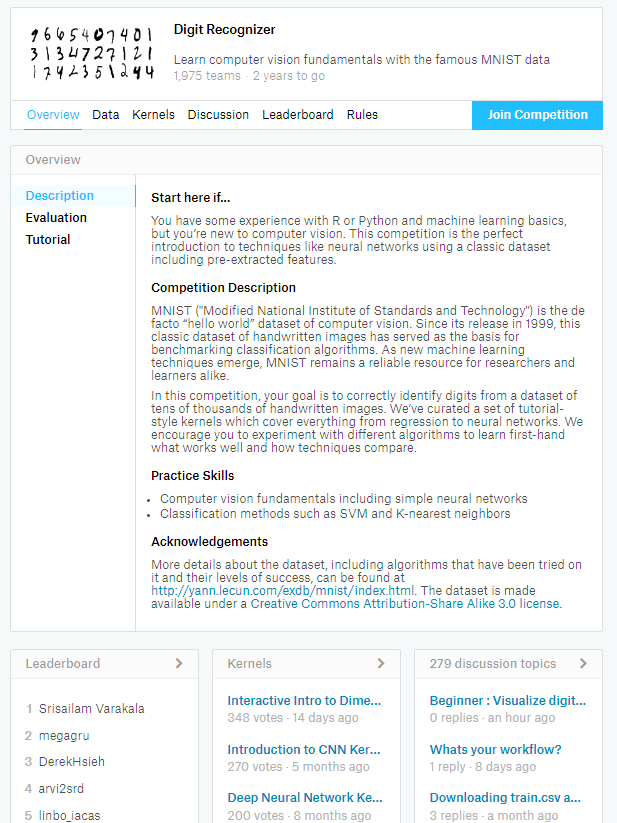

## 下載 dataset, 一般會有以下三種資料
* train and test dataset
* sample_submission.csv  ==> 提交預測結果檔案樣本格式
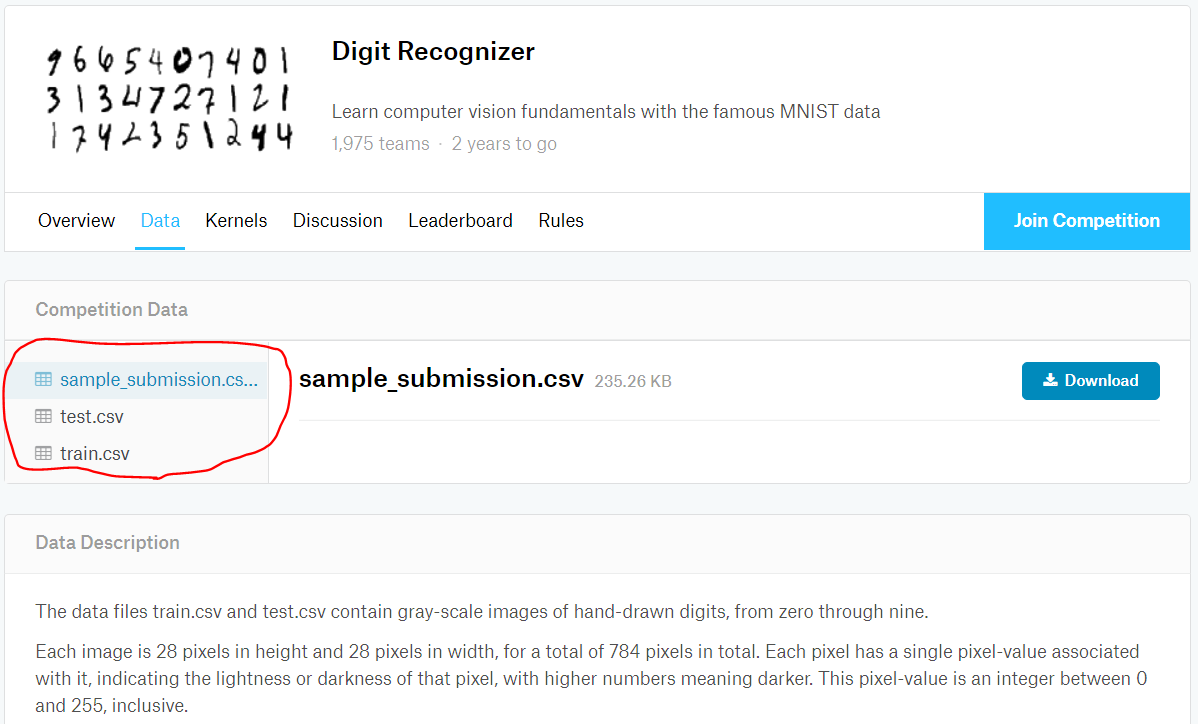

* train.csv
* csv table size 42001 x 785
* line 1: header 描述各 col. data
* one sample(image) 為 784 pixels = 28 x 28
* total 42000 組 training data
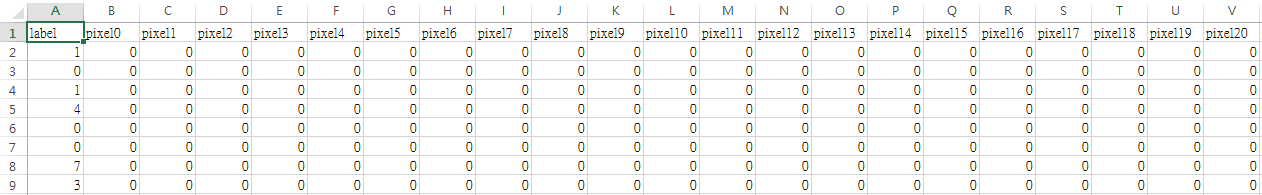

* test.csv
* test data 沒有 label 欄位
* total 28000 組 test data
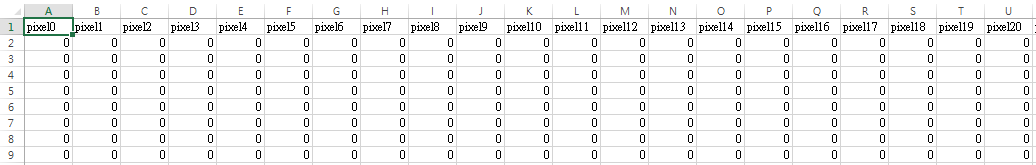

## 在 Tutorial 有各式教程可以參考
* 各 tutorial 稱為 "Kaggle Kernel", 也就是用 Jupyter notebook 格式製作
* 新手可以去 "fork" 簡單的 kernel, 然後就可以實際執行該 model, 也可以修改參數做實驗
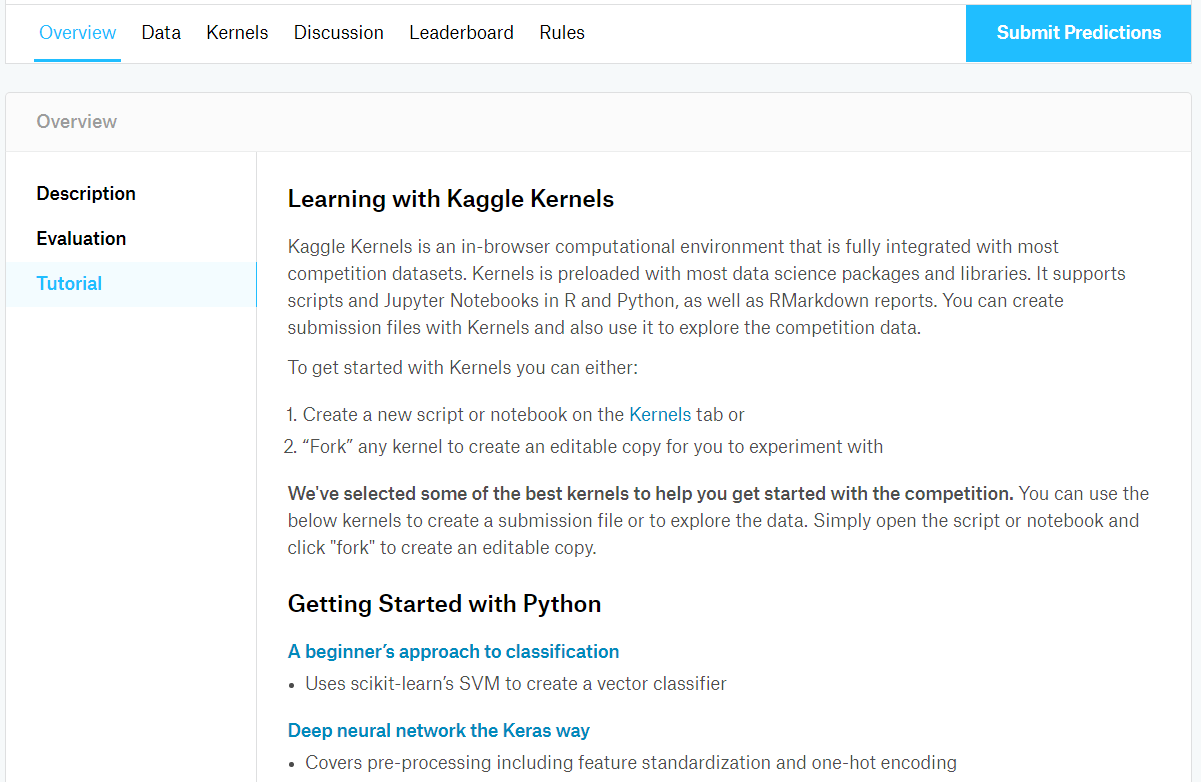

## 提交預測結果
* 在右上角有個 "Submit Predictions" button, 可以提交自己的測試結果
* 系統將測試你提交的結果的準確率，然後排名。
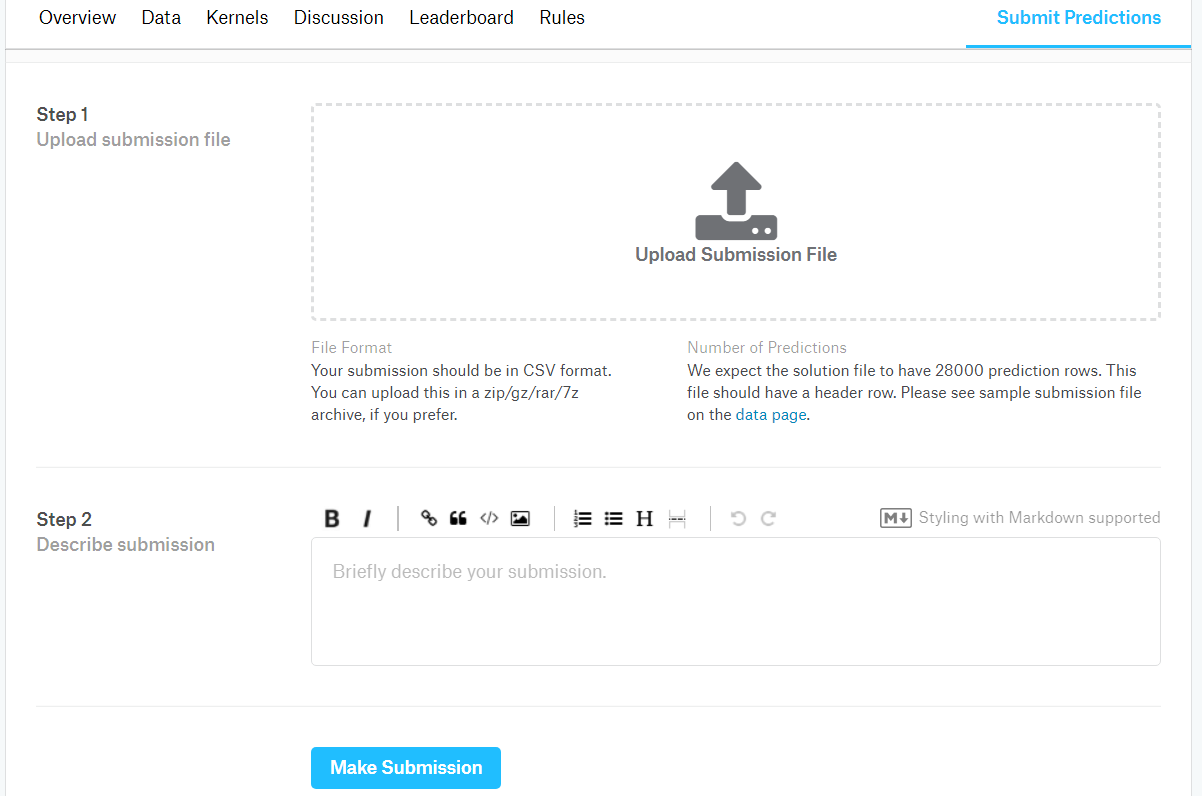

## 以下我是 fork kernel "Introduction to CNN Keras - Acc 0.997 (top 8%)" 來學習

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

/home/tony/dnn/anaconda2/envs/myjupyter/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load the data
train = pd.read_csv("./train.csv")
test_org = pd.read_csv("./test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

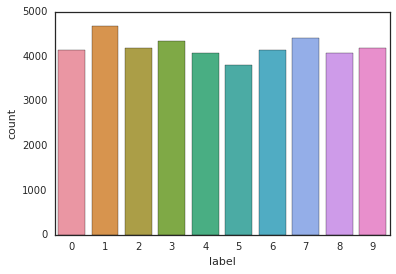

In [3]:
Y_train_org = train["label"]

# Drop 'label' column
X_train_org = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train_org)

Y_train_org.value_counts()  # 計算各 label 的 sample 數量

In [4]:
# Check the data
X_train_org.isnull().any().describe()
test_org.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
# Normalize the data
X_train_nl = X_train_org / 255.0
test_nl = test_org / 255.0

before X_train_nl.shape:(42000, 784)
after X_train.shape:(42000, 28, 28, 1)
test.shape:(28000, 28, 28, 1)


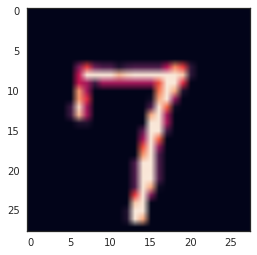

In [16]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
print("before X_train_nl.shape:%r" % (X_train_nl.shape,))
X_train = X_train_nl.values.reshape(-1,28,28,1)
test = test_nl.values.reshape(-1,28,28,1)
print("after X_train.shape:%r" % (X_train.shape,))
print("test.shape:%r" % (test.shape,))
plt.imshow(X_train[6,:,:,0])

In [20]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train_org, num_classes = 10)
print("Y_train.shape:%r" % (Y_train.shape,))

Y_train.shape:(42000, 10)


* 原作者是把 train data 分成 90% train and 10% test 作為 model 的 fit data
* why not use the original train data and test data???

X_train.shape:(27556, 28, 28, 1)
X_val.shape:(3062, 28, 28, 1)
Y_train[0]:array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])


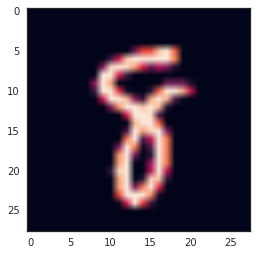

In [24]:
# Set the random seed
random_seed = 2

# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)
print("X_train.shape:%r" % (X_train.shape,))
print("X_val.shape:%r" % (X_val.shape,))

# Some examples
print("Y_train[0]:%r" % (Y_train[0]))
g = plt.imshow(X_train[0][:,:,0])

In [25]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [26]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [27]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [28]:
isAugment = False
if (isAugment):
    # With data augmentation to prevent overfitting (accuracy 0.99286)
    datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
            zoom_range = 0.1, # Randomly zoom image 
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=False,  # randomly flip images
            vertical_flip=False)  # randomly flip images
    datagen.fit(X_train)
    # Fit the model
    history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                                  epochs = epochs, validation_data = (X_val,Y_val),
                                  verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                                  , callbacks=[learning_rate_reduction])
else:
    # Without data augmentation i obtained an accuracy of 0.98114
    history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                        validation_data = (X_val, Y_val), verbose = 2)

Train on 27556 samples, validate on 3062 samples
Epoch 1/1
 - 528s - loss: 3.1612 - acc: 0.6597 - val_loss: 10.5808 - val_acc: 0.3432


/home/tony/dnn/anaconda2/envs/myjupyter/lib/python2.7/site-packages/matplotlib/artist.py:210: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


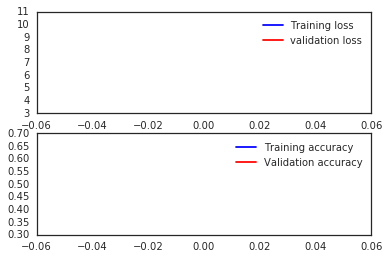

In [29]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

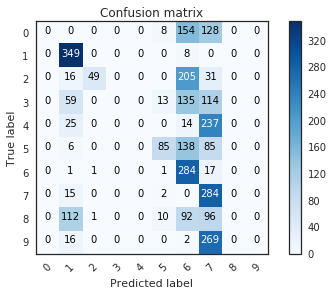

In [30]:
# Look at confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

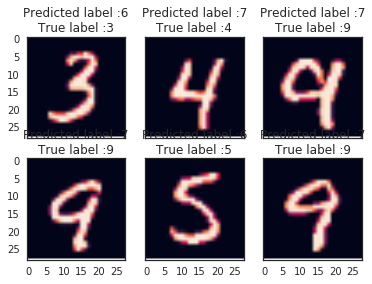

In [31]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [32]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [35]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("cnn_mnist_datagen.csv",index=False)

## 把訓練一次(epoch=1)的結果提交上去看看排名
* 排名 1929
* Score=0.35299, 正確率只有 35.299%
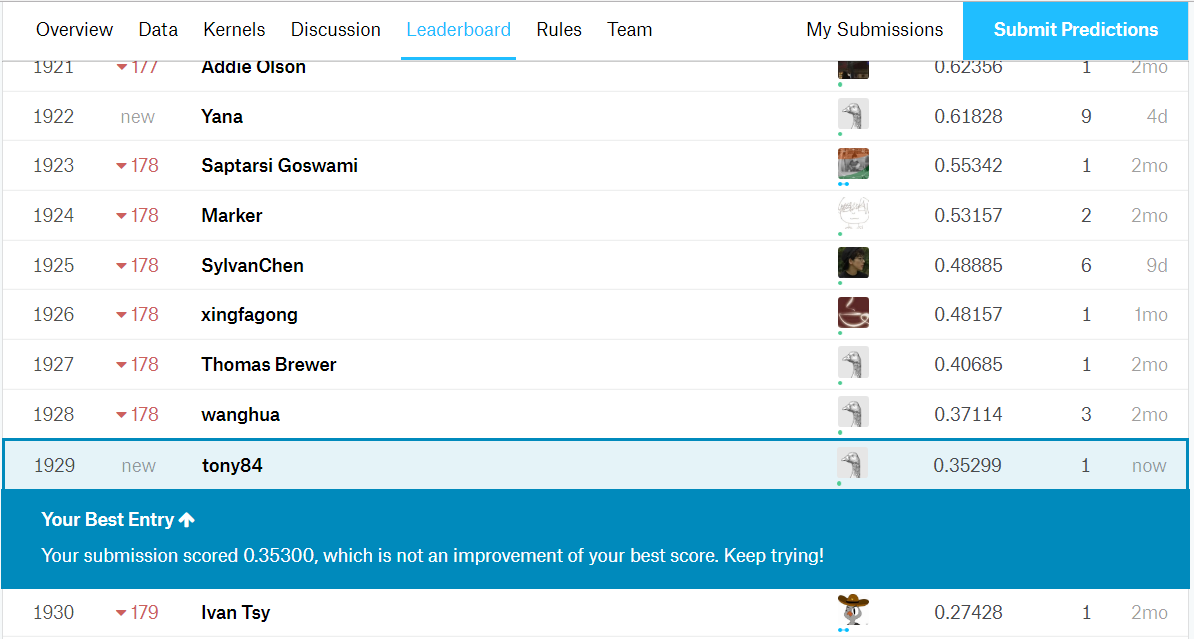